# Sentiment Analysis of IMDB Movie Reviews 

**Author**: Yellam Naidu Kottavalasa

**Email**: yellam.kottavalasa@studio.unibo.it

### Introduction 

The goal of sentiment analysis is to determine the attitude, opinion, or sentiment of the writer towards a particular topic, product, or service. Sentiment analysis of IMDB movie reviews involves analyzing these user-generated reviews to determine the sentiment towards a particular movie.

In the context of IMDB movie reviews, sentiment analysis involves classifying the reviews as positive, negative. This project is focused on comparing different text representations and learning models on a classification task.

### Comparing Three Text Representation Strategies and Four Classifiers for Sentiment Analysis

In this project, I worked with a large supervised dataset of English IMDB Movie reviews. I explored three text representation strategies and four classifiers to perform sentiment analysis on the movie reviews. The aim was to compare the performance of different models and select the best-performing models.


**Text Representation Strategies**

I used three text representation strategies:

1.**Bag-of-Words (BoW):** This approach represents each document as a vector of word frequencies, ignoring the order in which the words occur.

2.**TF-IDF:** This approach is similar to BoW, but it also considers the importance of each word in the document and across the corpus.

3.**Doc2Vec (d2v):** This approach represents each document as a vector in a high-dimensional space, where similar documents are located closer together.


**Classifiers**

Evaluated four classifiers:

1.**Logistic Regression**

2.**Decision Tree Classifier**

3.**Random Forest Classifier**

4.**Multinomial Naive Bayes Classifier**



**Base Models**

First implemented the base models for each combination of text representation strategy and classifier without any tuning. I used evaluation metrics such as accuracy, precision, recall, and F1-score to compare the performance of these models.

**Tuning Models**

Then I observed that the models needed tuning to improve their performance. I used grid search and cross-validation techniques to tune the hyperparameters of each model.

**Comparing Models**

Compared the performance of each pair of models using hypothesis testing. I used a significance level of 0.05 and calculated the test statistic and critical value to determine whether there was a statistically significant difference in performance between of the two models.

**Conclusion**

Based on our evaluation metrics and hypothesis testing, I selected LR, MNB with TF-IDF features are the best-performing models and then RFC gives better results with TF-IDF for sentiment analysis on the IMDB Movie reviews dataset.

## Importing Libraries

In [1]:
#Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import norm
from wordcloud import WordCloud
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.model_selection import GridSearchCV
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Dataset Loading 

The IMDB Movie Reviews dataset is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labeled as positive or negative.

The IMDB movie review dataset is freely available and can be downloaded from various sources, including the Stanford website and the Kaggle website. It has been used in a wide range of research and applications, including sentiment analysis, text classification, and machine learning.

In [2]:
#importing the data set
data=pd.read_csv("D:/TM_Project/IMDB Dataset.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.shape

(50000, 2)

In [5]:
data['sentiment'].replace(['positive','negative'],[1,0],inplace=True)

## Exploratery Data Analysis 

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing the main characteristics of a dataset to gain insights and understanding of the data. The purpose of EDA is to explore the data visually and statistically, identify patterns, relationships, and anomalies in the data, and generate hypotheses for further analysis.

In [6]:
#sentiment count
data['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

<AxesSubplot:title={'center':'sentiment'}>

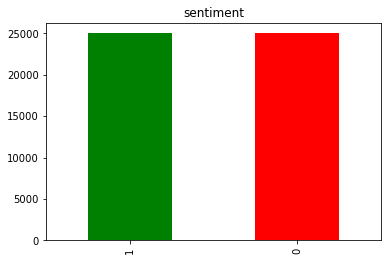

In [7]:
data['sentiment'].value_counts().plot.bar(title= 'sentiment',color=['green','red'])

In [8]:
# Checking for any missing values
data.isna().sum()

review       0
sentiment    0
dtype: int64

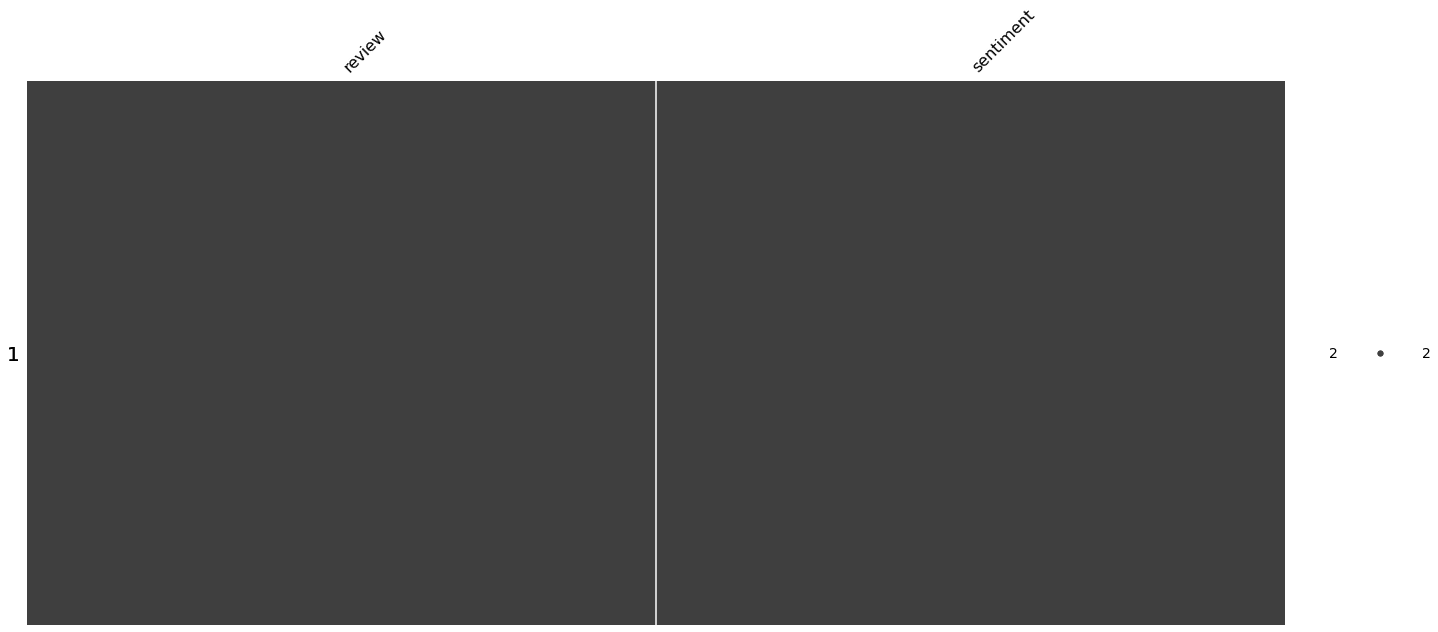

In [9]:
#plot for show the missing values
msno.matrix(data.sample())
plt.show()

## Pre-processing 

### Removing html strips and noise text 

When working with text data, it is often necessary to preprocess the data to remove irrelevant or distracting elements. Two common preprocessing steps for text data are removing HTML tags and removing square brackets.

Removing HTML tags involves stripping out any markup language that may be present in the text.  These tags are often included in web-based text data, and they can be distracting or irrelevant when analyzing the actual text content.

Removing square brackets can be necessary when working with text data that contains metadata or other information within brackets. For example, a text might contain references to [1] or [2,3] to indicate sources or citations. These square brackets can be distracting when analyzing the text content, so they are often removed during preprocessing.

In [10]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
data['review']=data['review'].apply(denoise_text)

### Removing special characters¶ 

Special characters can be distracting or irrelevant when analyzing the actual text content, and they can also introduce noise into the data. Therefore, it is often necessary to remove them during preprocessing.

By removing special characters, the resulting text data is cleaner and more focused on the actual content of the text. This can be helpful when working with text data for natural language processing or machine learning tasks, as it can improve the accuracy and effectiveness of the models being trained on the data.

In [11]:
def remove_special_characters(text):
    pattern=r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

data['review']=data['review'].apply(remove_special_characters)

### Removing numbers 

Numbers can be irrelevant or distracting when analyzing the actual text content, and they can also introduce noise into the data. Therefore, it is often necessary to remove them during preprocessing.

In [12]:
def remove_numbers(text):
    pattern = r'\d'
    text = re.sub(pattern, '', text)
    return text

data['review']=data['review'].apply(remove_numbers)

### Converting to Lowercase 

Converting all text to lowercase can help to normalize the text data and make it more consistent. It can also help to reduce the number of unique words in the data, which can be helpful for some natural language processing tasks.

In [13]:
def convert_to_lowercase(text):
    return text.lower()

data['review'] = data['review'].apply(convert_to_lowercase)

### Removing stopwords 

Stopwords are words that are very common in a language, but do not carry much meaning, such as "the", "a", "an", "and", "in", "of", "to", etc. These words can be distracting and can add noise to text data when performing natural language processing tasks. Therefore, it is common to remove stopwords from text data as a preprocessing step.

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [token.strip().lower() for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(tokens)
    return filtered_text

data['review']=data['review'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\Shanmuk
[nltk_data]     Kottavalasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shanmuk
[nltk_data]     Kottavalasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Text stemming 

Stemming is a process of reducing inflected (or sometimes derived) words to their base or root form. The resulting base form is often called the "stem".

Stemming is a common technique used in natural language processing (NLP) to improve the efficiency and effectiveness of text analysis and information retrieval systems.

In [15]:
#Stemming the text
def stemming(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

data['review']=data['review'].apply(stemming)

### Wordcloud 

A word cloud is a graphical representation of text data where the size of each word in the cloud is proportional to its frequency in the text. In other words, the more frequently a word appears in the text, the larger it appears in the word cloud.

Word clouds are often used to visualize the main themes or topics in a piece of text, such as a document, article, or website. They can be useful for quickly identifying the most commonly used words and phrases in the text and can help identify patterns and trends.

### Wordcloud for Positive review words 

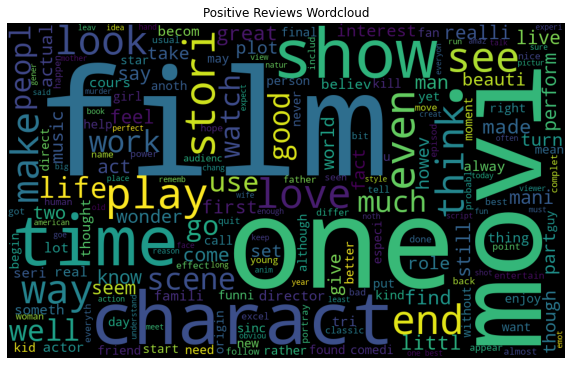

In [16]:
# concatenate all the positive reviews into one big string
positive_text = ' '.join(data[data['sentiment'] == 1]['review'])

# create a wordcloud object for the positive reviews
positive_wordcloud = WordCloud(width=1000, height=600, background_color='black', min_font_size=8).generate(positive_text)

# plot the wordcloud for the positive reviews
plt.figure(figsize=(10,8))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive Reviews Wordcloud')
plt.show()

### Wordcloud for Negative review words 

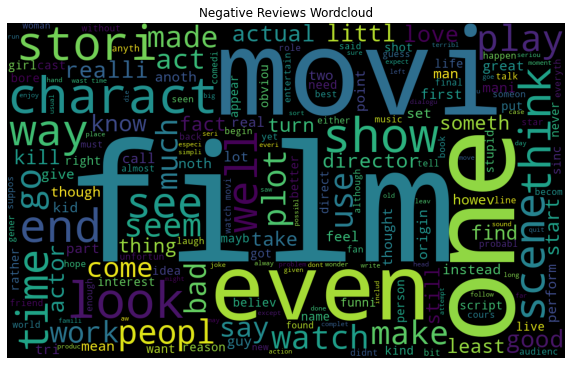

In [17]:
# concatenate all the negative reviews into one big string
negative_text = ' '.join(data[data['sentiment'] == 0]['review'])

# create a wordcloud object for the negative reviews
negative_wordcloud = WordCloud(width=1000, height=600, background_color='black', min_font_size=8).generate(negative_text)

# plot the wordcloud for the negative reviews
plt.figure(figsize=(10,8))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.title('Negative Reviews Wordcloud')
plt.show()

# Bags of words features 

The Bag of Words (BoW) model is the simplest form of text representation in numbers. Like the term itself, we can represent a sentence as a bag of words vector (a string of numbers).

Let’s recall the three types of movie reviews we saw earlier:

    Review 1: This movie is very scary and long

    Review 2: This movie is not scary and is slow

    Review 3: This movie is spooky and good

We will first build a vocabulary from all the unique words in the above three reviews. The vocabulary consists of these 11 words: ‘This’, ‘movie’, ‘is’, ‘very’, ‘scary’, ‘and’, ‘long’, ‘not’,  ‘slow’, ‘spooky’,  ‘good’.

We can now take each of these words and mark their occurrence in the three movie reviews above with 1s and 0s. This will give us 3 vectors for 3 reviews:

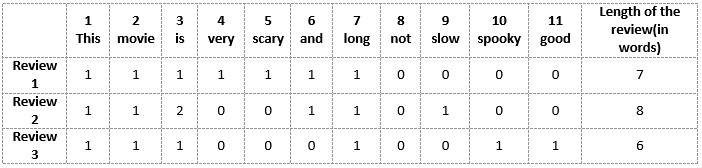

Vector of Review 1: [1 1 1 1 1 1 1 0 0 0 0]

Vector of Review 2: [1 1 2 0 0 1 1 0 1 0 0]

Vector of Review 3: [1 1 1 0 0 0 1 0 0 1 1]

These vectors can be used as input features for machine learning algorithms, such as classification or clustering. BoW features are simple and easy to compute.

In [18]:
#BOW vectorizer
vectorizer = CountVectorizer()
#transformed the reviews
bow_features = vectorizer.fit_transform(data['review'].tolist())
bow_features.shape

(50000, 174760)

In [19]:
y = data['sentiment']

In [20]:
# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(bow_features, y, test_size=0.2, random_state = 5)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))

There are 40000 samples in the training dataset
There are 10000 samples in the testing dataset


# Model Implemenations of BOW features

### Logistic Regression 

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. The below image is showing the logistic function:

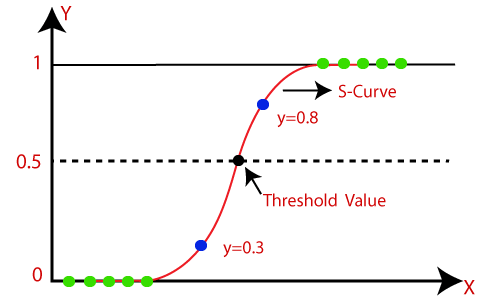

In [21]:
#Logistic Regression
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,lr_predictions))
print("The F1 score is:",f1_score(y_test, lr_predictions))

The accuracy score is: 0.8804
The F1 score is: 0.883088954056696


### Logistic Regression with Hyper-parameter Tuning

In [22]:
# Defining the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
             }

# Creating a logistic regression model
lr_tuning = LogisticRegression(random_state=2)

# Creating a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(lr_tuning, param_grid, cv= 5)

# Fitting the grid search object to the training data
grid_search.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_

# Printing the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search.best_score_))

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Corresponding mean cross-validation score: 0.884


In [23]:
# Predicting the labels for the test data
lr_predictions = best_lr.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,lr_predictions))
print("The F1 score is:",f1_score(y_test,lr_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,lr_predictions))

The accuracy score is: 0.8872
The F1 score is: 0.8898867629832097
The confusion matrix is: 
 [[4314  586]
 [ 542 4558]]


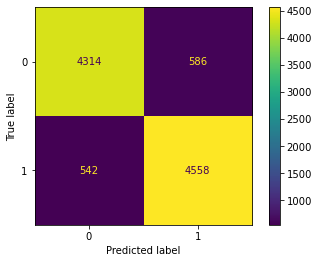

In [24]:
plot_confusion_matrix(best_lr,X_test,y_test)

In [25]:
# comprehensive summary of the model's performance on the test data
print('The classification report is:','\n',classification_report(y_test,lr_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4900
           1       0.89      0.89      0.89      5100

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Decision Tree Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.

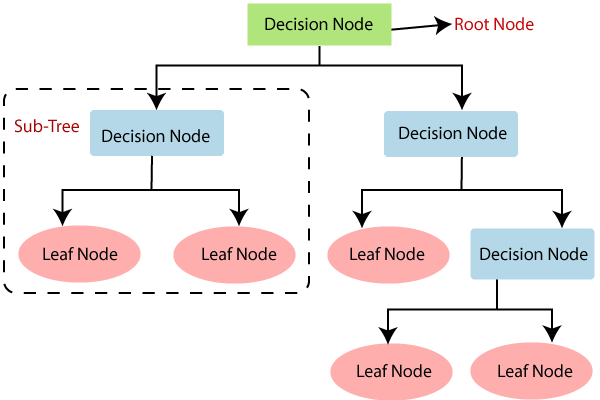

In [26]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predictions = dtc.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print("The F1 score is:",f1_score(y_test, dtc_predictions))

The accuracy score is: 0.7391
The F1 score is: 0.7425752343364578


### Decision Tree Classifier with Hyper-parameter Tuning 

In [27]:
# Define the hyper-parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6]
}

# Create a DecisionTreeClassifier object
dtc_tuning = DecisionTreeClassifier(random_state=5)

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtc_tuning, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search.best_params_
best_dtc = grid_search.best_estimator_

# Print the best hyper-parameters and the corresponding mean cross-validation score
print("Best hyper-parameters: ", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search.best_score_))

Best hyper-parameters:  {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2}
Corresponding mean cross-validation score: 0.742


In [28]:
dtc_predictions = best_dtc.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,dtc_predictions))
print("The F1 score is:",f1_score(y_test,dtc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_predictions))

The accuracy score is: 0.7468
The F1 score is: 0.7609065155807366
The confusion matrix is: 
 [[3439 1461]
 [1071 4029]]


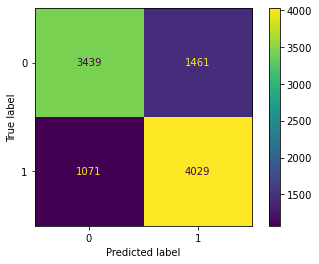

In [29]:
plot_confusion_matrix(best_dtc,X_test,y_test)

In [30]:
print('The classification report is:','\n',classification_report(y_test,dtc_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      4900
           1       0.73      0.79      0.76      5100

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



# Hypothesis Testing

Hypothesis testing is a statistical technique used to test whether a claim or hypothesis about a population parameter is supported by the available data. In hypothesis testing for comparison, we compare two sets of data or populations to determine whether they are significantly different from each other.

if test-statistic (t) > critical Value (C), we reject Null Hypothesis.

If test-statistic (t) ≤ critical value (C), we fail to reject Null Hypothesis.

# Hypothesis Testing for Comparing Performance of Logistic Regression and Decision Tree Classifier

In [31]:
# Step 1: Set significance level
alpha = 0.05

# Step 2: Define Bernoulli process
# Success is defined as correctly predicting the class label
# Failure is defined as incorrectly predicting the class label
successes_lr = sum(lr_predictions == y_test)
successes_dtc = sum(dtc_predictions == y_test)
n = len(y_test)

# Step 3: Calculate success probabilities
p_lr = successes_lr / n
p_dtc = successes_dtc / n

# Step 4: Calculate standard error of difference
SE = ((p_lr*(1-p_lr))/n + (p_dtc*(1-p_dtc))/n)**0.5

# Step 5: Calculate test statistic
z = (p_lr - p_dtc) / SE

# Step 6: Determine critical value
cv = norm.ppf(1 - alpha/2)

# Step 7: Compare test statistic to critical value and report results
if abs(z) > cv:
    print("Reject null hypothesis: LR and DTC have different performance of BOW features.")
else:
    print("Fail to reject null hypothesis: LR and DTC have the same performance of BOW features.")

Reject null hypothesis: LR and DTC have different performance of BOW features.


### Random Forest Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.

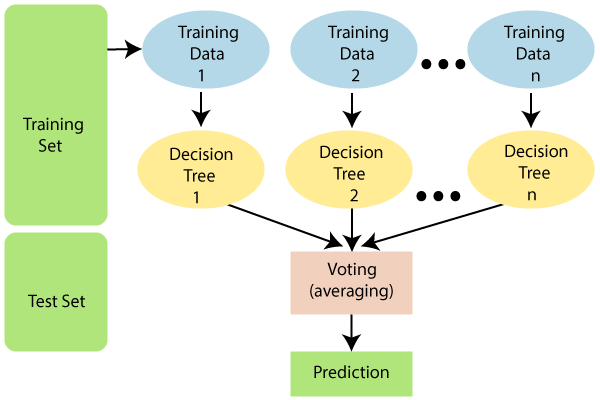

In [32]:
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,rfc_predictions))
print("The F1 score is:",f1_score(y_test,rfc_predictions))

The accuracy score is: 0.8561
The F1 score is: 0.8589353984903441


### Random Forest Classifier with Hyper-parameter Tuning 

In [33]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [200, 250],
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2]
}

# Create a random forest classifier
rfc_tuning = RandomForestClassifier(random_state=10)

# Create a grid search object with 5-fold cross-validation
grid_search = GridSearchCV(rfc_tuning, param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Extract the best hyperparameters and model
best_params = grid_search.best_params_
best_rfc = grid_search.best_estimator_

# Print the best hyper-parameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search.best_score_))

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Corresponding mean cross-validation score: 0.842


In [34]:
# Predict the labels for the test data
rfc_predictions = best_rfc.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,rfc_predictions))
print("The F1 score is:",f1_score(y_test,rfc_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,rfc_predictions))

The accuracy score is: 0.8435
The F1 score is: 0.8491566265060241
The confusion matrix is: 
 [[4030  870]
 [ 695 4405]]


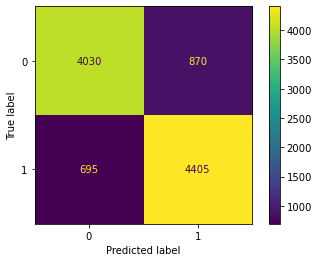

In [35]:
plot_confusion_matrix(best_rfc,X_test,y_test)

In [36]:
print('The classification report is:','\n',classification_report(y_test,rfc_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      4900
           1       0.84      0.86      0.85      5100

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Multinomial Navie Bayes Classifier 

The Multinomial Naive Bayes classifier is a probabilistic machine learning algorithm that is commonly used for text classification tasks, such as spam detection, sentiment analysis, and topic classification. It is a variant of the Naive Bayes algorithm that is specifically designed for discrete data, such as text data.

The algorithm works by calculating the conditional probability of each feature (word or term) given each class label (category). It assumes that the features are conditionally independent of each other, given the class label. This is known as the "naive" assumption and is often violated in real-world datasets, but the algorithm can still perform well in practice.

During training, the algorithm estimates the probability distribution of each feature given each class label, using the frequency of each feature in the training set. During prediction, the algorithm calculates the probability of each class label given the observed features, using Bayes' theorem. The class label with the highest probability is then assigned to the input data point.

In [37]:
# Multinomial Naive Bayes Classifier
mnb=MultinomialNB()
mnb=mnb.fit(X_train,y_train)
mnb_predictions = mnb.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,mnb_predictions))
print("The F1 score is:",f1_score(y_test,mnb_predictions))

The accuracy score is: 0.8553
The F1 score is: 0.8549082522811591


### Multinomial Navie Bayes Classifier with Hyper-parameter Tuning 

In [38]:
# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.25, 0.75], [0.4, 0.6]]
}

# Initialize the classifier
mnb_tuning = MultinomialNB()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=mnb_tuning, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search.best_params_
best_mnb = grid_search.best_estimator_

# Print the best hyper-parameters and the corresponding mean cross-validation score
print("Best hyper-parameters: ", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search.best_score_))

Best hyper-parameters:  {'alpha': 1.0, 'class_prior': [0.25, 0.75], 'fit_prior': True}
Corresponding mean cross-validation score: 0.854


In [39]:
mnb_predictions = best_mnb.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,mnb_predictions))
print("The F1 score is:",f1_score(y_test,mnb_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,mnb_predictions))

The accuracy score is: 0.8578
The F1 score is: 0.8609970674486804
The confusion matrix is: 
 [[4174  726]
 [ 696 4404]]


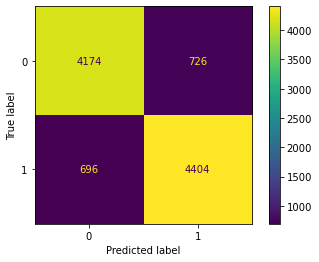

In [40]:
plot_confusion_matrix(best_mnb,X_test,y_test)

In [41]:
print('The classification report is:','\n',classification_report(y_test,mnb_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4900
           1       0.86      0.86      0.86      5100

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Hypothesis Testing for Comparing Performance of Random Forest and Multinomial Naive Bayes  Classifier

In [42]:
# Step 1: Set significance level
alpha = 0.05

# Step 2: Define Bernoulli process
# Success is defined as correctly predicting the class label
# Failure is defined as incorrectly predicting the class label
successes_rfc = sum(rfc_predictions == y_test)
successes_mnb = sum(mnb_predictions == y_test)
n = len(y_test)

# Step 3: Calculate success probabilities
p_rfc = successes_rfc / n
p_mnb = successes_mnb / n

# Step 4: Calculate standard error of difference
SE = ((p_rfc*(1-p_rfc))/n + (p_mnb*(1-p_mnb))/n)**0.5

# Step 5: Calculate test statistic
z = (p_rfc - p_mnb) / SE

# Step 6: Determine critical value
cv = norm.ppf(1 - alpha/2)

# Step 7: Compare test statistic to critical value and report results
if abs(z) > cv:
    print("Reject null hypothesis: RFC and MNB have different performance of BOW features.")
else:
    print("Fail to reject null hypothesis: RFC and MNB have the same performance of BOW features.")

Reject null hypothesis: RFC and MNB have different performance of BOW features.


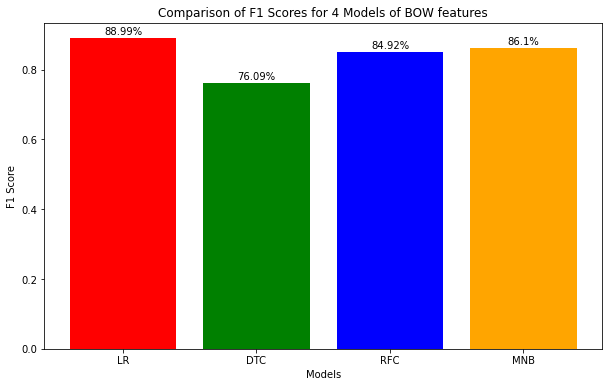

In [43]:
# F1 scores for each model
f1_scores = [f1_score(y_test, lr_predictions), f1_score(y_test, dtc_predictions),
             f1_score(y_test, rfc_predictions), f1_score(y_test, mnb_predictions)]

# Model names
models = ['LR', 'DTC', 'RFC', 'MNB']
# Set the colors for each bar
colors = ['red', 'green', 'blue', 'orange']
# Create bar graph
plt.figure(figsize=(10,6))
plt.bar(models, f1_scores, color=colors)

# Add text on top of each bar with the F1 score percentage
for i, v in enumerate(f1_scores):
    plt.text(i, v+0.01, str(round(v*100,2))+'%', color='black', ha='center')
    
plt.title('Comparison of F1 Scores for 4 Models of BOW features')
plt.xlabel('Models')
plt.ylabel('F1 Score')

# Show plot
plt.show()

# Term Frequency-Inverse Document Frequency model (TFIDF) features

Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

**Term Frequency (TF):** It is a measure of how frequently a term, t, appears in a document, d:

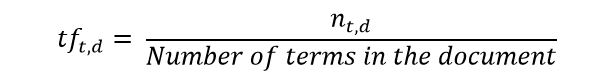

Now we will again use the same vocabulary we had built in the Bag-of-Words model to show how to calculate the TF for Review #2:

    Review 2: This movie is not scary and is slow

Here,
* Vocabulary: ‘This’, ‘movie’, ‘is’, ‘very’, ‘scary’, ‘and’, ‘long’, ‘not’,  ‘slow’, ‘spooky’,  ‘good’
* Number of words in Review 2 = 8
* TF for the word ‘this’ = (number of times ‘this’ appears in review 2)/(number of terms in review 2) = 1/8

Similarly,

TF(‘movie’) = 1/8,   
TF(‘is’) = 2/8 = 1/4,  
TF(‘very’) = 0/8 = 0,  
TF(‘scary’) = 1/8,  
TF(‘and’) = 1/8,  
TF(‘long’) = 0/8 = 0,  
TF(‘not’) = 1/8,  
TF(‘slow’) = 1/8,  
TF( ‘spooky’) = 0/8 = 0,  
TF(‘good’) = 0/8 = 0,  

We can calculate the term frequencies for all the terms and all the reviews in this manner:
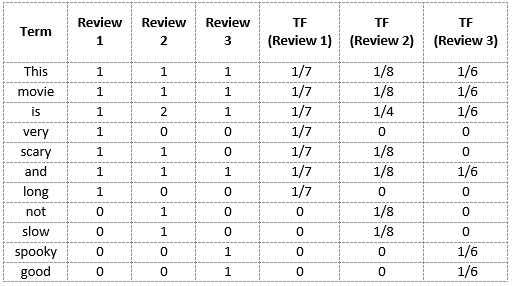

**Inverse Document Frequency (IDF):** IDF is a measure of how important a term is. We need the IDF value because computing just the TF alone is not sufficient to understand the importance of words:

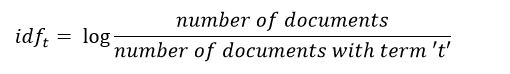

We can calculate the IDF values for the all the words in Review 2:

IDF(‘this’) =  log(number of documents/number of documents containing the word ‘this’) = log(3/3) = log(1) = 0

Similarly,

IDF(‘movie’, ) = log(3/3) = 0,  
IDF(‘is’) = log(3/3) = 0,  
IDF(‘not’) = log(3/1) = log(3) = 0.48,  
IDF(‘scary’) = log(3/2) = 0.18,  
IDF(‘and’) = log(3/3) = 0,  
IDF(‘slow’) = log(3/1) = 0.48,  
We can calculate the IDF values for each word like this. Thus, the IDF values for the entire vocabulary would be:
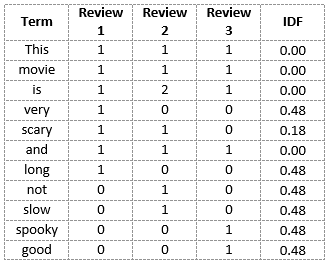

Hence, we see that words like “is”, “this”, “and”, etc., are reduced to 0 and have little importance; while words like “scary”, “long”, “good”, etc. are words with more importance and thus have a higher value.

We can now compute the TF-IDF score for each word in the corpus. Words with a higher score are more important, and those with a lower score are less important:

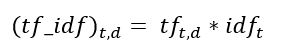

We can now calculate the TF-IDF score for every word in Review 2:

TF-IDF(‘this’, Review 2) = TF(‘this’, Review 2) * IDF(‘this’) = 1/8 * 0 = 0

Similarly,

TF-IDF(‘movie’, Review 2) = 1/8 * 0 = 0,  
TF-IDF(‘is’, Review 2) = 1/4 * 0 = 0,  
TF-IDF(‘not’, Review 2) = 1/8 * 0.48 = 0.06,  
TF-IDF(‘scary’, Review 2) = 1/8 * 0.18 = 0.023,  
TF-IDF(‘and’, Review 2) = 1/8 * 0 = 0,  
TF-IDF(‘slow’, Review 2) = 1/8 * 0.48 = 0.06,  
Similarly, we can calculate the TF-IDF scores for all the words with respect to all the reviews:

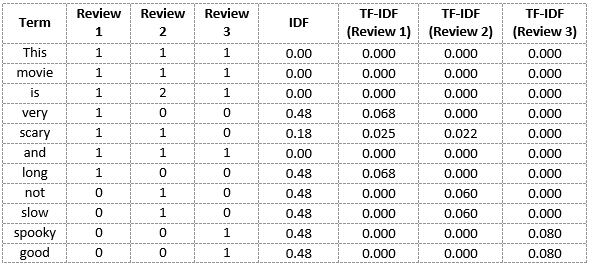

We have now obtained the TF-IDF scores for our vocabulary. TF-IDF also gives larger values for less frequent words and is high when both IDF and TF values are high i.e the word is rare in all the documents combined but frequent in a single document.

In [44]:
#Tfidf vectorizer
tfidf=TfidfVectorizer()
#transformed the reviews
tfidf_features=tfidf.fit_transform(data['review'].tolist())
tfidf_features.shape

(50000, 174760)

In [45]:
# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, y, test_size=0.2, random_state = 10)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))

There are 40000 samples in the training dataset
There are 10000 samples in the testing dataset


# Model Implementation of TF-IDF features

### Logistic Regression

In [46]:
#Logistic Regression
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train, y_train)
lr_tfidf_predictions = lr_tfidf.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,lr_tfidf_predictions))
print("The F1 score is:",f1_score(y_test, lr_tfidf_predictions))

The accuracy score is: 0.8891
The F1 score is: 0.8885539141794796


### Logistic Regression with Hyper-parameter Tuning

In [47]:
# Defining the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']
             }

# Creating a logistic regression model
lr_tuning_tfidf = LogisticRegression(random_state= 15)

# Creating a grid search object with 5-fold cross-validation
grid_search_tfidf = GridSearchCV(lr_tuning_tfidf, param_grid, cv=5)

# Fitting the grid search object to the training data
grid_search_tfidf.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search_tfidf.best_params_
best_lr_tfidf = grid_search_tfidf.best_estimator_

# Printing the best hyperparameters and the accuracy of the model
print("Best hyperparameters:", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search_tfidf.best_score_))

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Corresponding mean cross-validation score: 0.891


In [48]:
# Predicting the labels for the test data
lr_tfidf_predictions = best_lr_tfidf.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,lr_tfidf_predictions))
print("The F1 score is:",f1_score(y_test,lr_tfidf_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,lr_tfidf_predictions))

The accuracy score is: 0.8932
The F1 score is: 0.892099414023035
The confusion matrix is: 
 [[4517  591]
 [ 477 4415]]


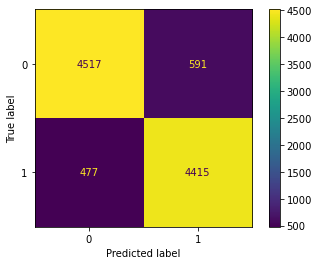

In [49]:
plot_confusion_matrix(best_lr_tfidf,X_test,y_test)

In [50]:
print('The classification report is:','\n',classification_report(y_test,lr_tfidf_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      5108
           1       0.88      0.90      0.89      4892

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### Decision Tree Classifier

In [51]:
#Decision Tree Classifier
dtc_tfidf = DecisionTreeClassifier()
dtc_tfidf.fit(X_train,y_train)
dtc_tfidf_predictions = dtc_tfidf.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,dtc_tfidf_predictions))
print("The F1 score is:",f1_score(y_test,dtc_tfidf_predictions))

The accuracy score is: 0.7239
The F1 score is: 0.7188677324101415


### Decision Tree Classifier with Hyper-parameter Tuning 

In [52]:
# Define the hyper-parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6]
}

# Create a DecisionTreeClassifier object
dtc_tuning_tfidf = DecisionTreeClassifier(random_state=5)

# Create a GridSearchCV object with 5-fold cross-validation
grid_search_tfidf = GridSearchCV(estimator=dtc_tuning_tfidf, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search_tfidf.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search_tfidf.best_params_
best_dtc_tfidf = grid_search_tfidf.best_estimator_

# Print the best hyper-parameters and the corresponding mean cross-validation score
print("Best hyper-parameters: ", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search_tfidf.best_score_))

Best hyper-parameters:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Corresponding mean cross-validation score: 0.740


In [53]:
# Predicting the labels for the test data
dtc_tfidf_predictions = best_dtc_tfidf.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,dtc_tfidf_predictions))
print("The F1 score is:",f1_score(y_test,dtc_tfidf_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_tfidf_predictions))

The accuracy score is: 0.736
The F1 score is: 0.7512250282698831
The confusion matrix is: 
 [[3374 1734]
 [ 906 3986]]


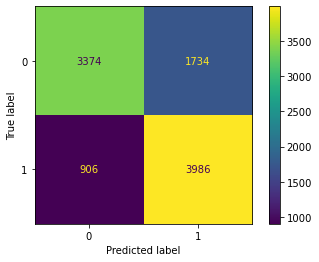

In [54]:
plot_confusion_matrix(best_dtc_tfidf,X_test,y_test)

In [55]:
print('The classification report is:','\n',classification_report(y_test,dtc_tfidf_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.79      0.66      0.72      5108
           1       0.70      0.81      0.75      4892

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.73     10000



# Hypothesis Testing for Comparing Performance of Logistic Regression and Decision Tree Classifier

In [56]:
# Step 1: Set significance level
alpha = 0.05

# Step 2: Define Bernoulli process
# Success is defined as correctly predicting the class label
# Failure is defined as incorrectly predicting the class label
successes_lr_tfidf = sum(lr_tfidf_predictions == y_test)
successes_dtc_tfidf = sum(dtc_tfidf_predictions == y_test)
n = len(y_test)

# Step 3: Calculate success probabilities
p_lr_tfidf = successes_lr_tfidf / n
p_dtc_tfidf = successes_dtc_tfidf / n

# Step 4: Calculate standard error of difference
SE = ((p_lr_tfidf*(1-p_lr_tfidf))/n + (p_dtc_tfidf*(1-p_dtc_tfidf))/n)**0.5

# Step 5: Calculate test statistic
z = (p_lr_tfidf - p_dtc_tfidf) / SE

# Step 6: Determine critical value
cv = norm.ppf(1 - alpha/2)

# Step 7: Compare test statistic to critical value and report results
if abs(z) > cv:
    print("Reject null hypothesis: LR and DTC have different performance of TFIDF features.")
else:
    print("Fail to reject null hypothesis: LR and DTC have the same performance of TFIDF features.")

Reject null hypothesis: LR and DTC have different performance of TFIDF features.


### Random Forest Classifier 

In [57]:
#Random Forest Classifier
rfc_tfidf = RandomForestClassifier()
rfc_tfidf.fit(X_train, y_train)
rfc_tfidf_predictions = rfc_tfidf.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,rfc_tfidf_predictions))
print("The F1 score is:",f1_score(y_test,rfc_tfidf_predictions))

The accuracy score is: 0.8496
The F1 score is: 0.8482647296206619


### Random Forest Classifier with Hyper-parameter Tuning 

In [58]:
# Defining the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2]
}

# Creating a random forest classifier
rfc_tuning_tfidf = RandomForestClassifier(random_state=10)

# Creating a grid search object with 5-fold cross-validation
grid_search_tfidf = GridSearchCV(rfc_tuning_tfidf, param_grid, cv=5)

# Fitting the grid search object to the training data
grid_search_tfidf.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search_tfidf.best_params_
best_rfc_tfidf = grid_search_tfidf.best_estimator_

# Print the best hyper-parameters and the corresponding mean cross-validation score
print("Best hyper-parameters: ", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search_tfidf.best_score_))

Best hyper-parameters:  {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Corresponding mean cross-validation score: 0.835


In [59]:
# Predicting the labels for the test data
rfc_tfidf_predictions = best_rfc_tfidf.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,rfc_tfidf_predictions))
print("The F1 score is:",f1_score(y_test,rfc_tfidf_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,rfc_tfidf_predictions))

The accuracy score is: 0.8333
The F1 score is: 0.840065240333877
The confusion matrix is: 
 [[3955 1153]
 [ 514 4378]]


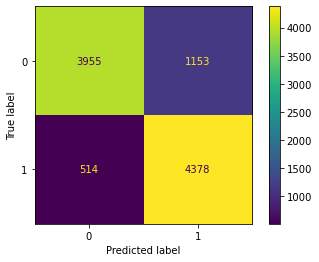

In [60]:
plot_confusion_matrix(best_rfc_tfidf,X_test,y_test)

In [61]:
print('The classification report is:','\n',classification_report(y_test,rfc_tfidf_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.88      0.77      0.83      5108
           1       0.79      0.89      0.84      4892

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



### Multinomial Naive Bayes Classifier 

In [62]:
# Multinomial Naive Bayes Classifier
mnb_tfidf=MultinomialNB()
mnb_tfidf=mnb_tfidf.fit(X_train,y_train)
mnb_tfidf_predictions = mnb_tfidf.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,mnb_tfidf_predictions))
print("The F1 score is:",f1_score(y_test,mnb_tfidf_predictions))

The accuracy score is: 0.8615
The F1 score is: 0.8585146593114721


### Multinomial Naive Bayes Classifier with Hyper-parameter Tuning

In [63]:
# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.25, 0.75], [0.4, 0.6]]
}

# Initialize the classifier
mnb_tuning_tfidf = MultinomialNB()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_tfidf = GridSearchCV(estimator=mnb_tuning_tfidf, param_grid=param_grid, cv=20)

# Fit GridSearchCV to the training data
grid_search_tfidf.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search_tfidf.best_params_
best_mnb_tfidf = grid_search_tfidf.best_estimator_

# Print the best hyper-parameters and the corresponding mean cross-validation score
print("Best hyper-parameters: ", grid_search_tfidf.best_params_)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search_tfidf.best_score_))

Best hyper-parameters:  {'alpha': 0.5, 'class_prior': None, 'fit_prior': True}
Corresponding mean cross-validation score: 0.859


In [64]:
mnb_tfidf_predictions = best_mnb_tfidf.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,mnb_tfidf_predictions))
print("The F1 score is:",f1_score(y_test,mnb_tfidf_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,mnb_tfidf_predictions))

The accuracy score is: 0.8624
The F1 score is: 0.8597635548308195
The confusion matrix is: 
 [[4406  702]
 [ 674 4218]]


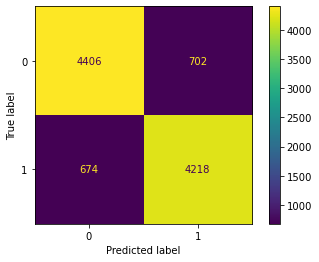

In [65]:
plot_confusion_matrix(best_mnb_tfidf,X_test,y_test)

In [66]:
print('The classification report is:','\n',classification_report(y_test,mnb_tfidf_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      5108
           1       0.86      0.86      0.86      4892

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Hypothesis Testing for Comparing Performance of Random Forest and Multinomial Naive Bayes Classifier

In [67]:
from scipy.stats import norm

# Step 1: Set significance level
alpha = 0.05

# Step 2: Define Bernoulli process
# Success is defined as correctly predicting the class label
# Failure is defined as incorrectly predicting the class label
successes_rfc_tfidf = sum(rfc_tfidf_predictions == y_test)
successes_mnb_tfidf = sum(mnb_tfidf_predictions == y_test)
n = len(y_test)

# Step 3: Calculate success probabilities
p_rfc_tfidf = successes_rfc_tfidf / n
p_mnb_tfidf = successes_mnb_tfidf / n

# Step 4: Calculate standard error of difference
SE = ((p_rfc_tfidf*(1-p_rfc_tfidf))/n + (p_mnb_tfidf*(1-p_mnb_tfidf))/n)**0.5

# Step 5: Calculate test statistic
z = (p_rfc_tfidf - p_mnb_tfidf) / SE

# Step 6: Determine critical value
cv = norm.ppf(1 - alpha/2)

# Step 7: Compare test statistic to critical value and report results
if abs(z) > cv:
    print("Reject null hypothesis: RFC and MNB have different performance of TFIDF features.")
else:
    print("Fail to reject null hypothesis: RFC and MNB have the same performance of TFIDF features.")

Reject null hypothesis: RFC and MNB have different performance of TFIDF features.


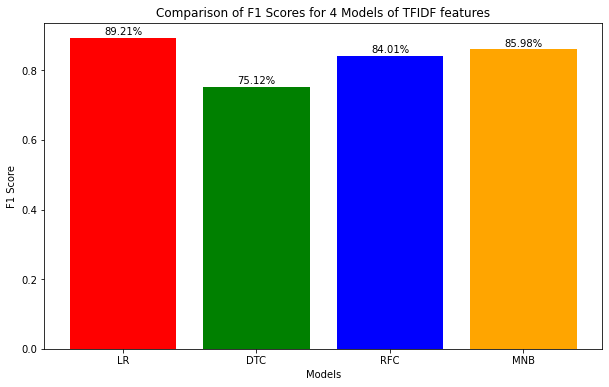

In [68]:
# F1 scores for each model
f1_scores = [f1_score(y_test, lr_tfidf_predictions), f1_score(y_test, dtc_tfidf_predictions),
             f1_score(y_test, rfc_tfidf_predictions), f1_score(y_test, mnb_tfidf_predictions)]

# Model names
models = ['LR', 'DTC', 'RFC', 'MNB']
colors = ['red', 'green', 'blue', 'orange']
# Create bar graph
plt.figure(figsize=(10,6))
plt.bar(models, f1_scores, color=colors)

# Add text on top of each bar with the F1 score percentage
for i, v in enumerate(f1_scores):
    plt.text(i, v+0.01, str(round(v*100,2))+'%', color='black', ha='center')
    
plt.title('Comparison of F1 Scores for 4 Models of TFIDF features')
plt.xlabel('Models')
plt.ylabel('F1 Score')

# Show plot
plt.show()

# Doc2Vec Features 

In [69]:
import gensim
# tokenize the reviews (assuming they've been preprocessed already)
tokenized_reviews = [review.split() for review in data['review']]

# create tagged documents for the reviews
tagged_reviews = [gensim.models.doc2vec.TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(tokenized_reviews)]

# train the doc2vec model
d2v_model = gensim.models.doc2vec.Doc2Vec(tagged_reviews, vector_size=100, window=5, min_count=4, workers=32, alpha=0.1, seed=23)

# get the document vectors for the reviews
doc_vectors = np.array([d2v_model.docvecs[i] for i in range(len(tokenized_reviews))])

In [70]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, y, test_size=0.2, random_state=42)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))

There are 40000 samples in the training dataset
There are 10000 samples in the testing dataset


### Logistic Regression 

In [71]:
#Logistic Regression
lr_doc2vec = LogisticRegression()
lr_doc2vec.fit(X_train, y_train)
lr_doc2vec_predictions = lr_doc2vec.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,lr_doc2vec_predictions))
print("The F1 score is:",f1_score(y_test,lr_doc2vec_predictions))

The accuracy score is: 0.8494
The F1 score is: 0.8511857707509882


### Logistic Regression with Hyper-parameter Tuning 

In [72]:
# Defining the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']
             }

# Creating a logistic regression model
lr_tuning_doc2vec = LogisticRegression(random_state= 15)

# Creating a grid search object with 5-fold cross-validation
grid_search_doc2vec = GridSearchCV(lr_tuning_doc2vec, param_grid, cv=5)

# Fitting the grid search object to the training data
grid_search_doc2vec.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search_doc2vec.best_params_
best_lr_doc2vec = grid_search_doc2vec.best_estimator_

# Printing the best hyperparameters and the Corresponding mean cross-validation score
print("Best hyperparameters:", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search_doc2vec.best_score_))

Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Corresponding mean cross-validation score: 0.851


In [73]:
# Predicting the labels for the test data
lr_doc2vec_predictions = best_lr_doc2vec.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,lr_doc2vec_predictions))
print("The F1 score is:",f1_score(y_test,lr_doc2vec_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,lr_doc2vec_predictions))

The accuracy score is: 0.8492
The F1 score is: 0.8509881422924902
The confusion matrix is: 
 [[4186  775]
 [ 733 4306]]


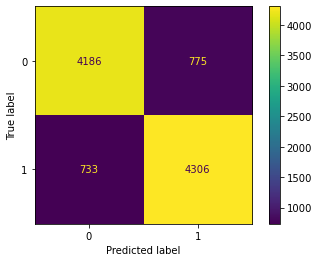

In [74]:
plot_confusion_matrix(best_lr_doc2vec,X_test,y_test)

In [75]:
print('The classification report is:','\n',classification_report(y_test,lr_doc2vec_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### Decision Tree Classifier

In [76]:
#Decision Tree Classifier
dtc_doc2vec = DecisionTreeClassifier()
dtc_doc2vec.fit(X_train,y_train)
dtc_doc2vec_predictions = dtc_doc2vec.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,dtc_doc2vec_predictions))
print("The F1 score is:",f1_score(y_test,dtc_doc2vec_predictions))

The accuracy score is: 0.6623
The F1 score is: 0.6653453572490338


### Decision Tree Classifier with Hyper-parameter Tuning 

In [77]:
# Define the hyper-parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6]
}

# Create a DecisionTreeClassifier object
dtc_tuning_doc2vec = DecisionTreeClassifier(random_state=5)

# Create a GridSearchCV object with 5-fold cross-validation
grid_search_doc2vec = GridSearchCV(estimator=dtc_tuning_doc2vec, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search_doc2vec.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search_doc2vec.best_params_
best_dtc_doc2vec = grid_search_doc2vec.best_estimator_

# Print the best hyper-parameters and the corresponding mean cross-validation score
print("Best hyper-parameters: ", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search_doc2vec.best_score_))

Best hyper-parameters:  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split': 2}
Corresponding mean cross-validation score: 0.683


In [78]:
# Predicting the labels for the test data
dtc_doc2vec_predictions = best_dtc_doc2vec.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,dtc_doc2vec_predictions))
print("The F1 score is:",f1_score(y_test,dtc_doc2vec_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,dtc_doc2vec_predictions))

The accuracy score is: 0.6712
The F1 score is: 0.666869300911854
The confusion matrix is: 
 [[3421 1540]
 [1748 3291]]


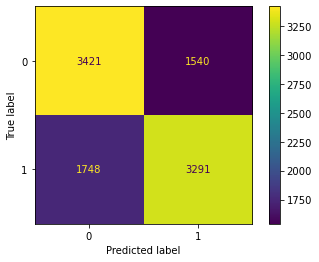

In [79]:
plot_confusion_matrix(best_dtc_doc2vec,X_test,y_test)

In [80]:
print('The classification report is:','\n',classification_report(y_test,dtc_doc2vec_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.66      0.69      0.68      4961
           1       0.68      0.65      0.67      5039

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



# Hypothesis Testing for Comparing Performance of Logistic Regression and Decision Tree Classifier

In [81]:
from scipy.stats import norm

# Step 1: Set significance level
alpha = 0.05

# Step 2: Define Bernoulli process
# Success is defined as correctly predicting the class label
# Failure is defined as incorrectly predicting the class label
successes_lr_doc2vec = sum(lr_doc2vec_predictions == y_test)
successes_dtc_doc2vec = sum(dtc_doc2vec_predictions == y_test)
n = len(y_test)

# Step 3: Calculate success probabilities
p_lr_doc2vec = successes_lr_doc2vec / n
p_dtc_doc2vec = successes_dtc_doc2vec / n

# Step 4: Calculate standard error of difference
SE = ((p_lr_doc2vec*(1-p_lr_doc2vec))/n + (p_dtc_doc2vec*(1-p_dtc_doc2vec))/n)**0.5

# Step 5: Calculate test statistic
z = (p_lr_doc2vec - p_dtc_doc2vec) / SE

# Step 6: Determine critical value
cv = norm.ppf(1 - alpha/2)

# Step 7: Compare test statistic to critical value and report results
if abs(z) > cv:
    print("Reject null hypothesis: LR and DTC have different performance of Doc2Vec features.")
else:
    print("Fail to reject null hypothesis: LR and DTC have the same performance of Doc2Vec features.")

Reject null hypothesis: LR and DTC have different performance of Doc2Vec features.


### Random Forest Classifier 

In [82]:
#Random Forest Classifier
rfc_doc2vec = RandomForestClassifier()
rfc_doc2vec.fit(X_train, y_train)
rfc_doc2vec_predictions = rfc_doc2vec.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,rfc_doc2vec_predictions))
print("The F1 score is:",f1_score(y_test,rfc_doc2vec_predictions))

The accuracy score is: 0.8142
The F1 score is: 0.8147557328015952


### Random Forest Classifier with Hyper-parameter Tuning 

In [83]:
# Defining the hyperparameters to tune
param_grid = {
    'n_estimators': [200, 250],
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2]
}

# Creating a random forest classifier
rfc_tuning_doc2vec = RandomForestClassifier(random_state=10)

# Creating a grid search object with 5-fold cross-validation
grid_search_doc2vec = GridSearchCV(rfc_tuning_doc2vec, param_grid, cv=5)

# Fitting the grid search object to the training data
grid_search_doc2vec.fit(X_train, y_train)

# Extracting the best hyperparameters and model
best_params = grid_search_doc2vec.best_params_
best_rfc_doc2vec = grid_search_doc2vec.best_estimator_

# Print the best hyper-parameters and the corresponding mean cross-validation score
print("Best hyper-parameters: ", best_params)
print("Corresponding mean cross-validation score: {:.3f}".format(grid_search_doc2vec.best_score_))

Best hyper-parameters:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 250}
Corresponding mean cross-validation score: 0.813


In [84]:
# Predicting the labels for the test data
rfc_doc2vec_predictions = best_rfc_doc2vec.predict(X_test)
print('The accuracy score is:',accuracy_score(y_test,rfc_doc2vec_predictions))
print("The F1 score is:",f1_score(y_test,rfc_doc2vec_predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,rfc_doc2vec_predictions))

The accuracy score is: 0.8097
The F1 score is: 0.8101745635910225
The confusion matrix is: 
 [[4036  925]
 [ 978 4061]]


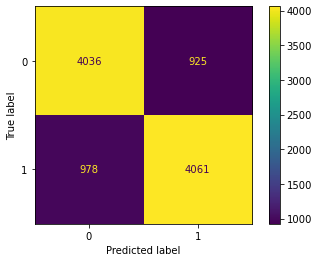

In [85]:
plot_confusion_matrix(best_rfc_doc2vec,X_test,y_test)

In [86]:
print('The classification report is:','\n',classification_report(y_test,rfc_doc2vec_predictions))

The classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      4961
           1       0.81      0.81      0.81      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



# Hypothesis Testing for Comparing Performance of Decision tree and Random Forest Classifier

In [92]:
from scipy.stats import norm

# Step 1: Set significance level
alpha = 0.05

# Step 2: Define Bernoulli process
# Success is defined as correctly predicting the class label
# Failure is defined as incorrectly predicting the class label
successes_dtc_doc2vec = sum(dtc_doc2vec_predictions == y_test)
successes_rfc_doc2vec = sum(rfc_doc2vec_predictions == y_test)
n = len(y_test)

# Step 3: Calculate success probabilities
p_dtc_doc2vec = successes_dtc_doc2vec / n
p_rfc_doc2vec = successes_rfc_doc2vec / n

# Step 4: Calculate standard error of difference
SE = ((p_dtc_doc2vec*(1-p_dtc_doc2vec))/n + (p_rfc_doc2vec*(1-p_rfc_doc2vec))/n)**0.5

# Step 5: Calculate test statistic
z = (p_dtc_doc2vec - p_rfc_doc2vec) / SE

# Step 6: Determine critical value
cv = norm.ppf(1 - alpha/2)

# Step 7: Compare test statistic to critical value and report results
if abs(z) > cv:
    print("Reject null hypothesis: DTC and RFC have different performance of Doc2Vec features.")
else:
    print("Fail to reject null hypothesis: DTC and RFC have the same performance of Doc2Vec features.")

Reject null hypothesis: DTC and RFC have different performance of Doc2Vec features.


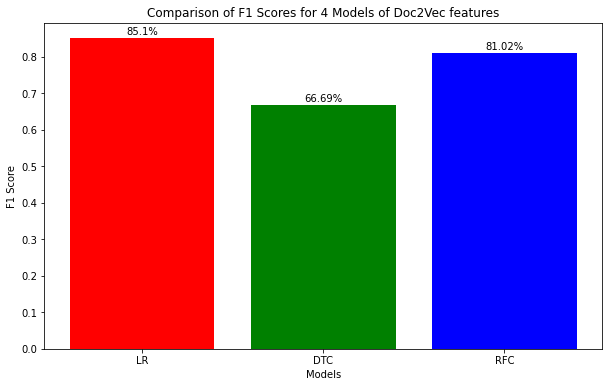

In [94]:
# F1 scores for each model
f1_scores = [f1_score(y_test, lr_doc2vec_predictions), f1_score(y_test, dtc_doc2vec_predictions),
             f1_score(y_test, rfc_doc2vec_predictions)]

# Model names
models = ['LR', 'DTC', 'RFC']
colors = ['red', 'green', 'blue']
# Create bar graph
plt.figure(figsize=(10,6))
plt.bar(models, f1_scores, color=colors)

# Add text on top of each bar with the F1 score percentage
for i, v in enumerate(f1_scores):
    plt.text(i, v+0.01, str(round(v*100,2))+'%', color='black', ha='center')
    
plt.title('Comparison of F1 Scores for 4 Models of Doc2Vec features')
plt.xlabel('Models')
plt.ylabel('F1 Score')

# Show plot
plt.show()

## Conclusion 

1. Based on my analysis of the IMDB dataset, I have applied four different classification algorithms with Hyper-parameter tuning (Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and Multinomial Naive Bayes) on two types of feature extraction methods (Bag-of-Words and TF-IDF).

    Here are some conclusion points and possible reasons why I got better performance in LR and MNB:

* Logistic Regression and Multinomial Naive Bayes outperformed the other algorithms in terms of model performance metrics such as accuracy, F1 score, precision, and recall.

* Logistic Regression (LR) is a linear model that works well when there is a linear relationship between the features and the target variable. LR is also less prone to overfitting and can handle large datasets efficiently. In contrast, Decision Tree Classifier (DTC) and Random Forest Classifier (RFC) are non-linear models that tend to overfit on small datasets.

* Multinomial Naive Bayes (MNB) is a probabilistic model that works well for text classification tasks like sentiment analysis. MNB assumes that the features are independent of each other, which may not be true in reality, but it still performs well in practice. MNB is also computationally efficient and can handle large feature sets.

    Here are some conclusion points and possible reasons why I got better performance in LR and RFC:

2. I have also applied three different classification algorithms with Hyper-parameter tuning (Logistic Regression, Decision Tree Classifier, Random Forest Classifier) on one type of feature extraction method (Doc2Vec), and the reason why I am not applying MNB of Doc2vec is Incompatibility between the feature type and the algorithm,and MNB may not be suitable for Doc2Vec features because it assumes a discrete count-based feature representation.

* Logistic Regression is outperformed with other models and also Random Forest Classifier is gives some better results compared to Decision Tree Classifier in terms of model performance metrics such as accuracy, F1 score, precision, and recall.

* Logistic Regression and Random Forest Classifier are suitable algorithms for Doc2Vec feature extraction method, as they can handle continuous data and capture non-linear relationships between the features and the target variable.

3. The hypothesis tests conducted between different models for each input features suggest that there is a statistically significant difference in model performance between different classification algorithms. This indicates that the choice of classification algorithm can have a significant impact on the accuracy and F1 score of the model.